# 🚗 Car Price Prediction Project
Manish Bhardwaj
2315510116
Date: 16 july 2025

***Data Understanding and Exploration***



In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Datasets ML/CarPricePrediction.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [25]:
#Add derived features
df['Mileage'] = (2025 - df['year']) * 10000  #i added 2 columns Mileage and Location becuase they are not in dataset but in project overview pdf
locations = ['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai']
df['Location'] = np.random.choice(locations, size=df.shape[0])

In [26]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Mileage,Location
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,180000,Chennai
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,180000,Delhi
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,130000,Delhi
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,80000,Delhi
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,110000,Mumbai


In [27]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Mileage', 'Location'],
      dtype='object')

In [28]:
df.shape

(4340, 10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   Mileage        4340 non-null   int64 
 9   Location       4340 non-null   object
dtypes: int64(4), object(6)
memory usage: 339.2+ KB


In [30]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Mileage          0
Location         0
dtype: int64

In [31]:
df.describe()

,year,selling_price,km_driven,Mileage
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,119092.165899
std,4.215344,5.785487e+05,46644.102194,42153.439397
min,1992.000000,2.000000e+04,1.000000,50000.000000
25%,2011.000000,2.087498e+05,35000.000000,90000.000000
50%,2014.000000,3.500000e+05,60000.000000,110000.000000
75%,2016.000000,6.000000e+05,90000.000000,140000.000000
max,2020.000000,8.900000e+06,806599.000000,330000.000000


***Exploratory Data Analysis (EDA)***

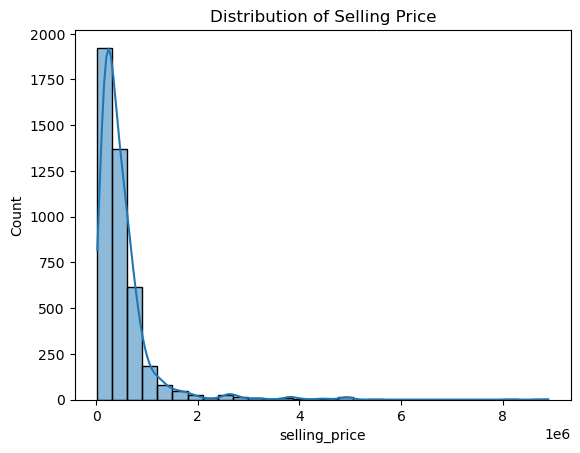

In [32]:

sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.show()

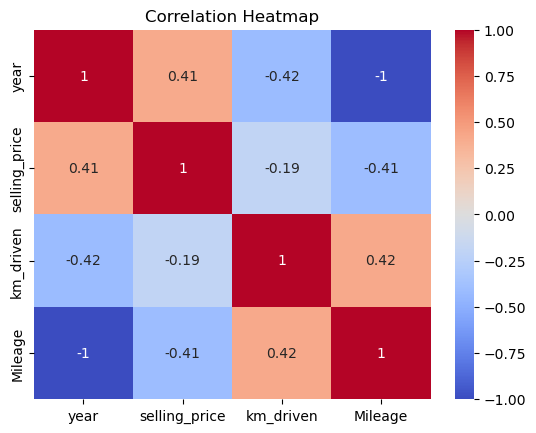

In [33]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


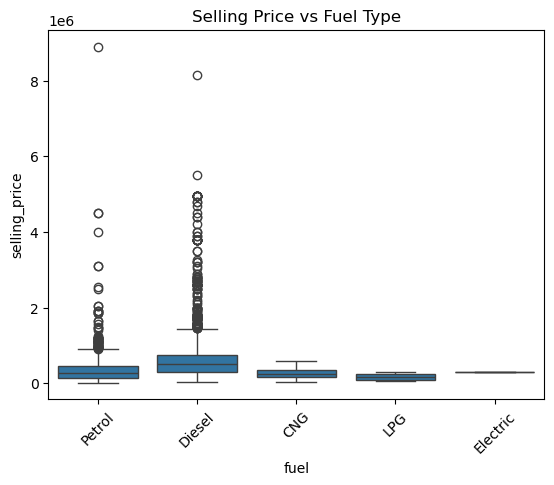

In [34]:

sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title("Selling Price vs Fuel Type")
plt.xticks(rotation=45)
plt.show()


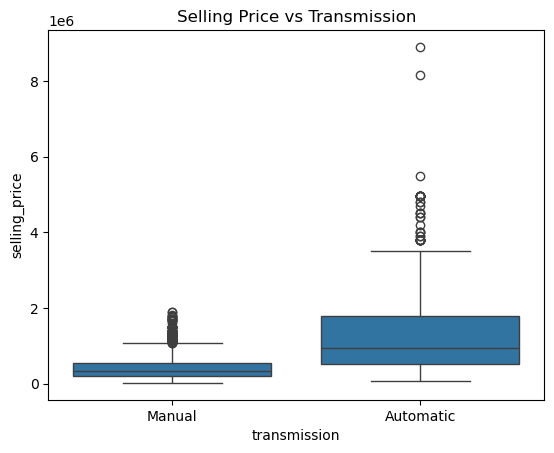

In [35]:

sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title("Selling Price vs Transmission")
plt.show()


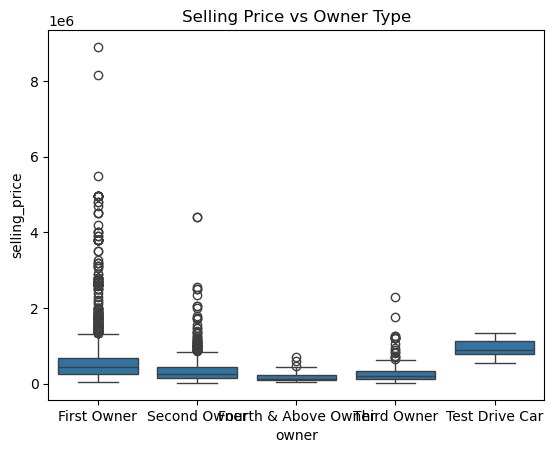

In [36]:

sns.boxplot(x='owner', y='selling_price', data=df)
plt.title("Selling Price vs Owner Type")
plt.show()


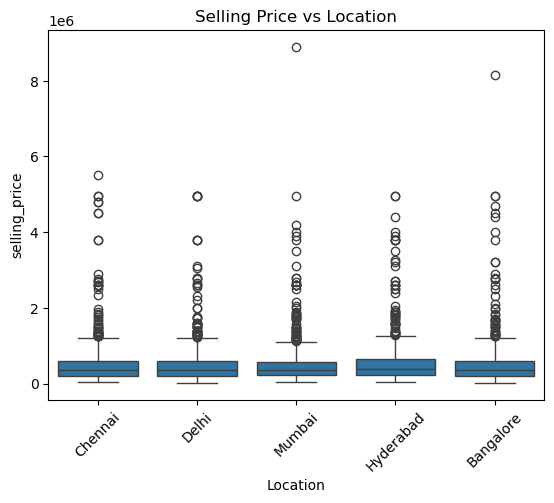

In [37]:

sns.boxplot(x='Location', y='selling_price', data=df)
plt.title("Selling Price vs Location")
plt.xticks(rotation=45)
plt.show()


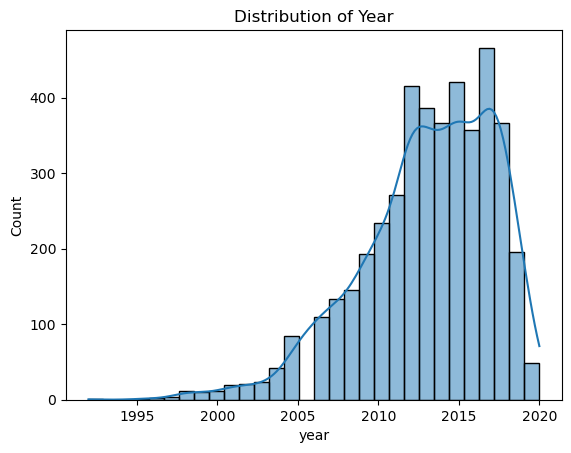

In [38]:

sns.histplot(df['year'], bins=30, kde=True)
plt.title("Distribution of Year")
plt.show()


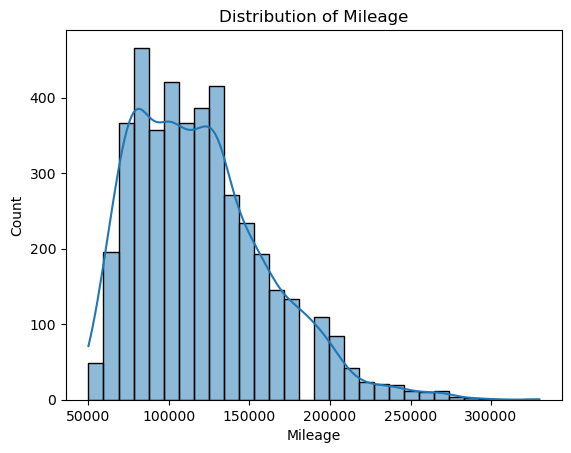

In [39]:

sns.histplot(df['Mileage'], bins=30, kde=True)
plt.title("Distribution of Mileage")
plt.show()


***Data Preprocessing***

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  # <-- Add StandardScaler here

# Create LabelEncoder objects
le_name = LabelEncoder()
le_fuel = LabelEncoder()
le_seller = LabelEncoder()
le_trans = LabelEncoder()
le_owner = LabelEncoder()
le_location = LabelEncoder()

# Apply encoding
df['name'] = le_name.fit_transform(df['name'])
df['fuel'] = le_fuel.fit_transform(df['fuel'])
df['seller_type'] = le_seller.fit_transform(df['seller_type'])
df['transmission'] = le_trans.fit_transform(df['transmission'])
df['owner'] = le_owner.fit_transform(df['owner'])
df['Location'] = le_location.fit_transform(df['Location'])

In [41]:
df.dtypes

name             int32
year             int64
selling_price    int64
km_driven        int64
fuel             int32
seller_type      int32
transmission     int32
owner            int32
Mileage          int64
Location         int32
dtype: object

In [42]:
# Define X and y
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

***Model Development***

In [43]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

***Model Evaluation***

In [44]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Scrore',r2_score(y_test,y_pred))

MAE 221709.74063973382
MSE 184225713662.06934
RMSE 429215.2299978058
R2_Scrore 0.396318311242709


***Model Interpretation***


In [45]:

coefficients = pd.DataFrame(model.coef_, columns=['Coefficient'], index=X.columns)
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
year,78311.728292
Location,3723.865231
seller_type,-10663.697451
name,-14152.828132
owner,-17611.671197
km_driven,-47345.080976
Mileage,-78311.728292
fuel,-144528.373042
transmission,-275773.054038


***Conclusion***
- The Linear Regression model performs reasonably well on this dataset.
- Further improvements can include feature engineering, outlier removal, or using advanced models.
- Visual and coefficient analysis help understand the main drivers of car price.